<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 1: Principal Component Analysis (PCA) with Loadings Biplot

<p style="text-align: justify">
<br><br>
This tutorial covers the necessary steps for producting a PCA with biplot.
</p>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red', size=4>Disclaimer: It is assumed that any data used with this workflow has been cleaned and any missing values either removed or imputed, as this workflow does not perform data cleaning or missing value removal/imputation. 
</div>

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), Seaborn (<a href="https://seaborn.pydata.org/">seaborn.pydata.org</a>, and Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os
   
from beakerx.object import beakerx 
beakerx.pandas_display_table() # by default display pandas tables as BeakerX interactive tables

home = os.getcwd() + "/"

import numpy as np
import pandas as pd
#from IPython.display import IFrame,HTML
#import matplotlib.pyplot as plt
#import matplotlib
import multivis
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak sheet</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> sheets from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br><br>

This dataset has previously been published in (<a href="https://physoc.onlinelibrary.wiley.com/doi/full/10.1113/EP087159">Lawler et al. (2018)</a>) in <i>Experimental Physiolgy</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>
    
Further information on the publication with a link to the data repository can be found here: Project ID <a href="XXX">XXX</a>). 

Please inspect the <a href="Data.xlsx">Excel file</a> before using it in this tutorial to understadn its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'Data.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="Data.xlsx">Data.xlsx</a>, and then rerun the workflow.

</div></div>

In [2]:
file = 'NathanDataPub.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading sheet: Peak
Loading sheet: Data
TOTAL SAMPLES: 29 TOTAL PEAKS: 32
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data sheet

Using the <b>BeakerX</b> package we can interactively view and check the Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>

</div>

In [3]:
#display(DataTable)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak sheet

Using the <b>BeakerX</b> package we can interactively view and check the Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

In [4]:
#display(PeakTable)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 3. Log transform and scale values

Transformation can be done with a log which is commonly used for biological data types, however there are other types such as square, square root, cube root or reciprocal transformation, which may be suitable for other types of data. Scaling is highly dependent on the values found in the dataset. If the dataset contains a number of values which are very large compared to the majority of other values, then this may skew the data in favour of those values and consequently bias the results. Scaling methods such as unit variance and pareto scaling scale all the values in the dataset so that they all values are comparable.

</div>

In [5]:
scaler = StandardScaler()

peaklist = list(PeakTable['Name'])
X = DataTable[peaklist]

Xlog = np.log10(X)                            # Log transform (base-10)
#Xscale = scaler.fit_transform(Xlog)           # Scale to unit variance (in this case scaling only spreads the loadings more in PC1 than in PC2)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 4. Plot the PCA with loadings Biplot

Plots the PCA with a loadings Biplot. The PCA in the left panel is a multivariate data analysis or ordination method which explains the variance across a group of samples by computing their principle components through Singular Value Decomposition (SVD). The principle components are then ordered by decreasing variance, and taking the first two components with the most variance, are projected to a lower dimensional space of two dimensions. The loadings biplot on the right panel is an additional feature of a PCA and can indicate which metabolites contribute to the principal components and drive the majority of the observed variance seen in the PCA plot.
</div>

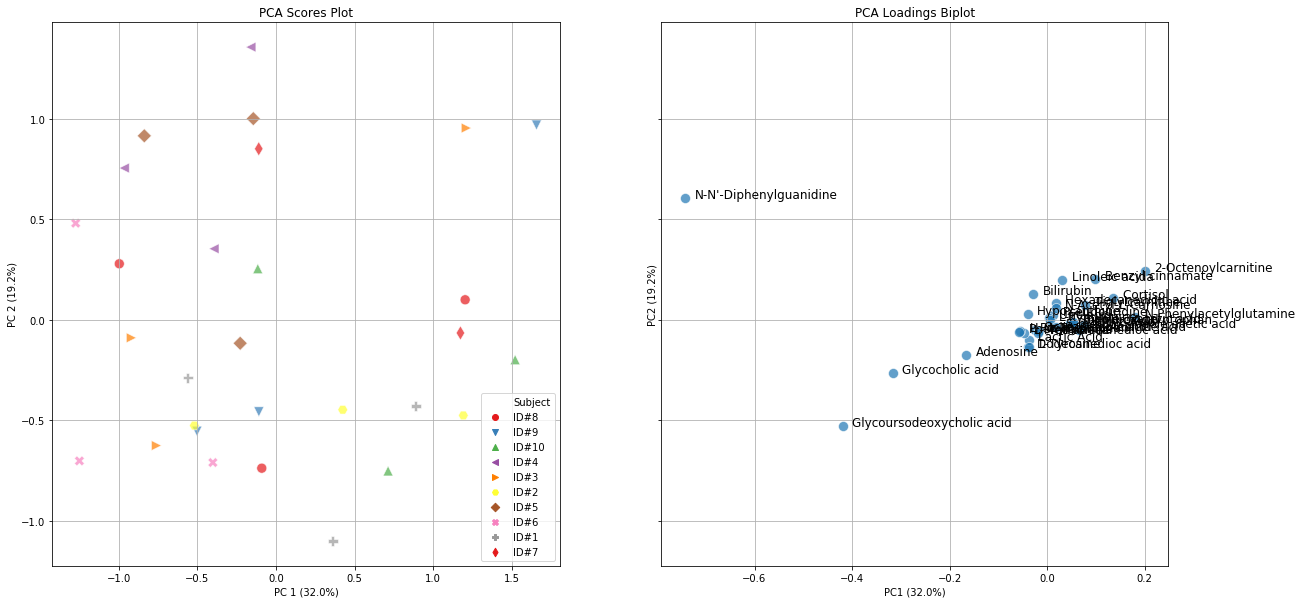

In [6]:
multivis.pca(Xlog, imageFileName='PCA_biplot.png', saveImage=True, dpi=300, pcx=1, pcy=2, group_label=DataTable.Subject, sample_label=None, peak_label=PeakTable.Label, markerSize=100, fontSize=12, figSize=(20,10))